<a href="https://colab.research.google.com/github/caropilardiaz/Challenge/blob/main/XGBoost_%26_Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SHAP. SHapley Additive exPlanations##

In [ ]:
pip install -U databricks-connect==12.2.*

Python interpreter will be restarted.
Python interpreter will be restarted.


In [ ]:
!pip install xgboost

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-5fcc015a-6cb4-4eab-aa63-103bafb867f2/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install scikit-learn

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-5fcc015a-6cb4-4eab-aa63-103bafb867f2/bin/python -m pip install --upgrade pip' command.


In [ ]:
import sklearn.ensemble
import shap
import numpy as np
import numba
import time
import xgboost
import warnings
warnings.filterwarnings('ignore')

**MODEL COMPLETE N°1: Without reduction of dimensions, ALL FEATURES 668**

**BUCKET CLEAN**

In [ ]:
df_demo=spark.read.format('parquet').options(header='true',sep=',').load("/mnt/sandbox/distribuidora/AR/Development/excdelpila/Microsegmentacion/data/05_primary/df_demo.parquet")
df_store=spark.read.format('parquet').options(header='true',sep=',').load("/mnt/sandbox/distribuidora/AR/Development/excdelpila/Microsegmentacion/data/05_primary/df_store.parquet")
df_clima=spark.read.format('parquet').options(header='true',sep=',').load("/mnt/sandbox/distribuidora/AR/Development/excdelpila/Microsegmentacion/data/05_primary/df_clima.parquet")
df_sales=spark.read.format('parquet').options(header='true',sep=',').load("/mnt/sandbox/distribuidora/AR/Development/excdelpila/Microsegmentacion/data/05_primary/df_sales.parquet")
df_aof=spark.read.format('parquet').options(header='true',sep=',').load("/mnt/sandbox/distribuidora/AR/Development/excdelpila/Microsegmentacion/data/05_primary/df_aof.parquet")

In [ ]:
moi_pd_potential_mdt_clean=spark.read.format('parquet').options(header='true',sep=',').load("/mnt/sandbox/distribuidora/AR/Development/excdelpila/Microsegmentacion/data/05_primary/moi_pd_potential_mdt_clean.parquet")

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round
# Redondear las columnas numéricas a 2 decimales
df_sales = df_sales.select([round(col(c), 2).alias(c) if c in df_sales.columns else c for c in df_sales.columns])

# Mostrar las primeras filas del DataFrame redondeado
#display(df_sales)

In [ ]:
import pandas as pd

def spark_to_pandas(spark_df):
    return spark_df.toPandas()



In [ ]:
df_demo_pandas = spark_to_pandas(df_demo)
df_store_pandas = spark_to_pandas(df_store)
df_clima_pandas = spark_to_pandas(df_clima)
df_sales_pandas = spark_to_pandas(df_sales)
df_aof_pandas = spark_to_pandas(df_aof)

In [ ]:
import pandas as pd

dataframes = [df_demo_pandas, df_store_pandas, df_clima_pandas, df_sales_pandas, df_aof_pandas]

# Columna por la cual quieres unir los DataFrames
columna_unir = 'id_pdv_unique'

# Unir los DataFrames en un bucle
combined_df = dataframes[0]  # Inicialmente, combined_df es igual al primer DataFrame
for df in dataframes[1:]:
    combined_df = combined_df.merge(df, on=columna_unir, how='inner')

# Verificar el resultado
combined_df.head()  # Muestra las primeras filas del DataFrame combinado


,id_pdv_unique,Segment_x,al_menos_un_indicador_nbi_hogares_con_nbi,al_menos_un_indicador_nbi_hogares_sin_nbi,cantidad_de_personas_por_hogar_personas_por_hogar,cantidad_de_viviendas_por_radio_total_de_viviendas,condicion_de_actividad_desocupado,condicion_de_actividad_inactivo,condicion_de_actividad_ocupado,condicion_de_asistencia_escolar_asiste,condicion_de_asistencia_escolar_asistio,condicion_de_asistencia_escolar_nunca_asistio,indice_de_poblacion_adulta_mayor_total_poblacion_de_65_anos_o_mas,indice_de_poblacion_adulta_mayor_total_poblacion_menor_de_65_anos_,nivel_educativo_que_cursa_o_curso_educacion_especial,nivel_educativo_que_cursa_o_curso_egb,nivel_educativo_que_cursa_o_curso_inicial_jardin_preescolar_,nivel_educativo_que_cursa_o_curso_polimodal,nivel_educativo_que_cursa_o_curso_post_universitario,nivel_educativo_que_cursa_o_curso_primario,nivel_educativo_que_cursa_o_curso_secundario,nivel_educativo_que_cursa_o_curso_superior_no_universitario,nivel_educativo_que_cursa_o_curso_universitario,regimen_de_tenencia_propietario_solo_de_la_vivienda,relacion_o_parentesco_con_el_jefe_a_del_hogar_yerno_nuera,sabe_leer_y_escribir_no,sabe_leer_y_escribir_si,sexo_mujer,sexo_varon,tasa_de_desocupacion_poblacion_economicamente_activa,tasa_de_desocupacion_poblacion_economicamente_activa_desocupada,telefono_celular_no,telefono_celular_si,telefono_de_linea_no,telefono_de_linea_si,menores_de_15,menores_de_30,menores_de_45,menores_de_60,menores_de_75,...,num_programado_sku_orden,num_impulsado_sku_orden,percent_programado_sku,percent_impulsado_sku,transformed_sales_kgn_y,Segment,Microseg,influence_area_number_of_almacenes,influence_area_number_of_autoservicios,influence_area_number_of_corporativos,influence_area_number_of_dieteticas,influence_area_number_of_establecimientos_edu,influence_area_number_of_estaciones_de_servic,influence_area_number_of_kioscos,influence_area_number_of_no_tradicionales,pois_alcohol,pois_bakery,pois_bus_stop,pois_chocolate,pois_clinic,pois_coffee,pois_college,pois_confectionery,pois_deli,pois_department_store,pois_general,pois_health_food,pois_hospital,pois_ice_cream,pois_kiosk,pois_light_rail,pois_mall,pois_school,pois_station,pois_subway,pois_supermarket,pois_tea,pois_university,pois_water,transformed_sales_kgn
0,691660000004231,2.0,98.0,201,3,323,28,231,267,200,441,21,97,598,0,9,24,6,2,271,238,53,38,4,10,37,625,367,328,426,7,36,185,153,68,172,135,133,124,81,...,1.05,5.65,0.15,0.84,5.24,2.0,40.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,5.244822
1,691790000221706,3.0,153.0,212,3,270,18,284,387,330,530,42,69,885,3,22,30,33,2,370,282,57,58,17,12,73,830,492,462,602,2,36,217,170,83,283,253,178,139,73,...,2.35,6.56,0.33,0.66,8.33,3.0,34.0,11.0,4.0,0.0,0.0,0.0,1.0,13.0,3.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,1,0.0,0.0,0,0.0,0,0.0,8.328988
2,691820000000910,4.0,173.0,76,4,222,3,57,132,149,136,12,6,318,3,7,27,0,0,109,110,19,10,1,1,40,257,172,152,175,2,10,72,71,11,143,75,83,15,7,...,1.71,3.24,0.36,0.62,5.69,4.0,30.0,11.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,0.0,0.0,0,0.0,0,0.0,5.690892
3,691820000003367,2.0,150.0,242,3,297,26,296,467,374,600,41,86,985,4,10,41,9,3,365,365,96,76,10,17,78,937,550,522,693,3,50,232,157,124,292,284,218,152,89,...,2.49,1.57,0.57,0.36,6.00,2.0,45.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.0,1.0,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1,0.0,0.0,1,0.0,0,0.0,6.003302
4,691840000010220,1.0,13.0,189,3,233,2,240,252,176,411,33,61,582,2,24,16,37,0,386,94,17,11,17,1,50,570,309,334,422,0,29,171,184,16,160,148,124,128,56,...,2.64,2.28,0.59,0.38,6.03,1.0,22.0,16.0,5.0,0.0,0.0,0.0,0.0,12.0,10.0,0.0,3.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,0.0,0,0.0,0.0,4,0.0,0,0.0,6.029777


In [ ]:
# Columnas a eliminar
columns_to_drop = ["Microseg", "Segment", "id_pdv_unique"]

# Procesar cada DataFrame filtrado
for df in dataframes:
    for column in columns_to_drop:
        if column in df:
            df.drop(columns=column, inplace=True)

**MODEL REDUCE N°2: TRAIN,TEST,CLEAN "Modelo reducido con SVD 62 FEATURES**

In [ ]:

tsvd_train_global=spark.read.format('parquet').options(header='true',sep=',').load("/mnt/sandbox/distribuidora/AR/Development/excdelpila/Microsegmentacion/data/05_primary/tsvd_train_global.parquet")
tsvd_test_global=spark.read.format('parquet').options(header='true',sep=',').load("/mnt/sandbox/distribuidora/AR/Development/excdelpila/Microsegmentacion/data/05_primary/tsvd_test_global.parquet")

In [ ]:
X_train_svd = spark_to_pandas(tsvd_train_global)
X_test_svd = spark_to_pandas(tsvd_test_global)
moi_pd_potential_clean_svd = spark_to_pandas(moi_pd_potential_mdt_clean)

In [ ]:
# Unir conservando solo ciertas columnas
merged_df = X_all_svd.merge(moi_pd_potential_clean_svd[['id_pdv_unique', 'transformed_sales_kgn']], on='id_pdv_unique', how='inner')

# Visualizar el DataFrame resultante
print(merged_df)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File <command-3559574928005085>:2
      1 # Unir conservando solo ciertas columnas
----> 2 merged_df = X_all_svd.merge(moi_pd_potential_clean_svd[['id_pdv_unique', 'transformed_sales_kgn']], on='id_pdv_unique', how='inner')
      4 # Visualizar el DataFrame resultante
      5 print(merged_df)

File /databricks/python/lib/python3.9/site-packages/pandas/core/frame.py:9345, in DataFrame.merge(self, right, how, on, left_on, right_on, left_index, right_index, sort, suffixes, copy, indicator, validate)
   9326 @Substitution("")
   9327 @Appender(_merge_doc, indents=2)
   9328 def merge(
   (...)
   9341     validate: str | None = None,
   9342 ) -> DataFrame:
   9343     from pandas.core.reshape.merge import merge
-> 9345     return merge(
   9346         self,
   9347         right,
   9348         how=how,
   9349         on=on,
   9350    

In [ ]:
moi_pd_potential_clean_svd.shape

Out[18]: (129542, 670)

In [ ]:
X_all_svd=pd.concat([X_train_svd,X_test_svd]).reset_index(drop=True)#nos sirve para obtener los SHAP VALUES

**MODEL SELECT N°3:"Modelo 40 FEATURES SELECCIONADAS POR EL NEGOCIO"**

In [ ]:
moi_pd_potential_mdt_clean_select=spark.read.format('parquet').options(header='true',sep=',').load("/mnt/sandbox/distribuidora/AR/Development/excdelpila/Microsegmentacion/data/05_primary/moi_pd_potential_mdt_clean_select.parquet")

In [ ]:
if 'LTM_sales_kgn' in moi_pd_potential_mdt_clean_select.columns:
    moi_pd_potential_mdt_clean_select = moi_pd_potential_mdt_clean_select.drop('LTM_sales_kgn')
else:
    print("La columna 'LTM_sales_kgn' no existe en el DataFrame 'moi_pd_potential_mdt_clean_select'.")

In [ ]:
moi_pd_potential_mdt_clean_select = moi_pd_potential_mdt_clean_select.toPandas()

In [ ]:
moi_pd_potential_mdt_clean_select.columns

Out[16]: Index(['id_pdv_unique', 'Segment', 'Microseg', 'geohash', 'pv_x', 'pv_y',
       'alcoholic_drinks_yes', 'pois_school', 'pois_bus_stop',
       'pois_supermarket', 'pois_university', 'digital_payment_yes',
       'main_regions', 'subcanal_oriental', 'categoria_a_', 'categoria_b1_',
       'categoria_b2_', 'categoria_c_', 'categoria_d_', 'size',
       'has_freezer_arcor', 'fridge_count', 'weekend_afternoon_19_avg',
       'location_en_una_avenida', 'menores_de_60', 'store_totaldevices_19',
       'pdv_per_geohash', 'perform_cluster_kgn', 'annual_schedule_visits',
       'perform_channel_kgn', 'perform_pdv_inside_microcluster',
       'media_mean_salary', 'pv_pcia', 'habitantes', 'orders_quantity',
       'fea_people_density_sqkm', 'EXHIBIDORES ALIMENTOS',
       'EXHIBIDORES GOLOSINAS', 'star_pdv_microseg', 'transformed_sales_kgn'],
      dtype='object')

In [ ]:
 moi_pd_potential_mdt_clean_select["Segment"] = moi_pd_potential_mdt_clean_select["Segment"].astype("category")
 moi_pd_potential_mdt_clean_select["Microseg"] =  moi_pd_potential_mdt_clean_select["Microseg"].astype("category")
 moi_pd_potential_mdt_clean_select["id_pdv_unique"] =  moi_pd_potential_mdt_clean_select["id_pdv_unique"].astype("object")

In [ ]:

# Convert the categorical columns to category data type
moi_pd_potential_mdt_clean_select["Segment"] = moi_pd_potential_mdt_clean_select["Segment"].astype("category")
moi_pd_potential_mdt_clean_select["Microseg"] = moi_pd_potential_mdt_clean_select["Microseg"].astype("category")

# Apply one-hot encoding using pd.get_dummies()
moi_pd_potential_mdt_encoded = pd.get_dummies(moi_pd_potential_mdt_clean_select, columns=["Segment", "Microseg"])

# The resulting DataFrame 'moi_pd_potential_mdt_encoded' now contains one-hot encoded columns for 'Segment' and 'Microseg'.


In [ ]:

# Mapea los valores numéricos de 'Segment' a cadenas
segment_mapping = {
    1: 'S1',
    2: 'S2',
    3: 'S3',
    # ... mapea todos los valores necesarios aquí
    7: 'S7'
}

# Crea la nueva columna 'Segment_Str' utilizando el mapeo
moi_pd_potential_mdt_clean_select['Segment_Str'] = moi_pd_potential_mdt_clean_select['Segment'].map(segment_mapping)


In [ ]:
moi_pd_potential_mdt_clean_select.columns

Out[20]: Index(['id_pdv_unique', 'Segment', 'Microseg', 'geohash', 'pv_x', 'pv_y',
       'alcoholic_drinks_yes', 'pois_school', 'pois_bus_stop',
       'pois_supermarket', 'pois_university', 'digital_payment_yes',
       'main_regions', 'subcanal_oriental', 'categoria_a_', 'categoria_b1_',
       'categoria_b2_', 'categoria_c_', 'categoria_d_', 'size',
       'has_freezer_arcor', 'fridge_count', 'weekend_afternoon_19_avg',
       'location_en_una_avenida', 'menores_de_60', 'store_totaldevices_19',
       'pdv_per_geohash', 'perform_cluster_kgn', 'annual_schedule_visits',
       'perform_channel_kgn', 'perform_pdv_inside_microcluster',
       'media_mean_salary', 'pv_pcia', 'habitantes', 'orders_quantity',
       'fea_people_density_sqkm', 'EXHIBIDORES ALIMENTOS',
       'EXHIBIDORES GOLOSINAS', 'star_pdv_microseg', 'transformed_sales_kgn',
       'Segment_Str'],
      dtype='object')

In [ ]:
final_select=[#id_pdv_unique', 'Segment', 'Microseg', 'geohash', 'pv_x', 'pv_y','main_regions',  'categoria_a_', 'categoria_b1_',
       #'categoria_b2_', 'categoria_c_', 'categoria_d_',
       'alcoholic_drinks_yes', 'pois_school', 'pois_bus_stop',
       'pois_supermarket', 'pois_university', 'digital_payment_yes',
       'subcanal_oriental', 'size',
       'has_freezer_arcor', 'fridge_count', 'weekend_afternoon_19_avg',
       'location_en_una_avenida', 'menores_de_60', 'store_totaldevices_19',
       'pdv_per_geohash', #'perform_cluster_kgn','perform_channel_kgn','transformed_sales_kgn', 'pv_pcia',
       'annual_schedule_visits',
       'perform_pdv_inside_microcluster',
       'media_mean_salary','habitantes','orders_quantity',
       'fea_people_density_sqkm', 'EXHIBIDORES ALIMENTOS',
       'EXHIBIDORES GOLOSINAS', 'star_pdv_microseg']
       #'Segment_Str',]

In [ ]:
target_ = "transformed_sales_kgn"
excluded_ = [target_, "Segment", "Microseg"]

In [ ]:
from sklearn.model_selection import train_test_split

X_ = moi_pd_potential_mdt_clean_select
y_ =  moi_pd_potential_mdt_clean_select[target_]
star_mask = X_['star_pdv_microseg'] == 1   #seleccionar a los buenos
#not_star_mask = X_['star_pdv_microseg'] != 1
#X_train_all = X_.loc[star_mask][final_select + ["id_pdv_unique"]]
#y_train_all = y_.loc[star_mask]
X_all = X_[final_select]
y_all = y_

#partir los buenos en 2
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=42)


In [ ]:
X_.columns

Out[24]: Index(['id_pdv_unique', 'Segment', 'Microseg', 'geohash', 'pv_x', 'pv_y',
       'alcoholic_drinks_yes', 'pois_school', 'pois_bus_stop',
       'pois_supermarket', 'pois_university', 'digital_payment_yes',
       'main_regions', 'subcanal_oriental', 'categoria_a_', 'categoria_b1_',
       'categoria_b2_', 'categoria_c_', 'categoria_d_', 'size',
       'has_freezer_arcor', 'fridge_count', 'weekend_afternoon_19_avg',
       'location_en_una_avenida', 'menores_de_60', 'store_totaldevices_19',
       'pdv_per_geohash', 'perform_cluster_kgn', 'annual_schedule_visits',
       'perform_channel_kgn', 'perform_pdv_inside_microcluster',
       'media_mean_salary', 'pv_pcia', 'habitantes', 'orders_quantity',
       'fea_people_density_sqkm', 'EXHIBIDORES ALIMENTOS',
       'EXHIBIDORES GOLOSINAS', 'star_pdv_microseg', 'transformed_sales_kgn',
       'Segment_Str'],
      dtype='object')

In [ ]:
#X_train= X_train.drop(columns=["id_pdv_unique"])
#X_test= X_test.drop(columns=["id_pdv_unique"])
#X_train= X_train.drop(columns=["Microseg"])
#X_test= X_test.drop(columns=["Microseg"])
#X_train= X_train.drop(columns=["Segment"])
#X_test= X_test.drop(columns=["Segment"])

In [ ]:
print(X_.shape)
print(X_all.shape)
print(y_all.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(177852, 41)
(177852, 24)
(177852,)
(133389, 24)
(133389,)
(44463, 24)
(44463,)


In [ ]:
X_all.columns

Out[27]: Index(['alcoholic_drinks_yes', 'pois_school', 'pois_bus_stop',
       'pois_supermarket', 'pois_university', 'digital_payment_yes',
       'subcanal_oriental', 'size', 'has_freezer_arcor', 'fridge_count',
       'weekend_afternoon_19_avg', 'location_en_una_avenida', 'menores_de_60',
       'store_totaldevices_19', 'pdv_per_geohash', 'annual_schedule_visits',
       'perform_pdv_inside_microcluster', 'media_mean_salary', 'habitantes',
       'orders_quantity', 'fea_people_density_sqkm', 'EXHIBIDORES ALIMENTOS',
       'EXHIBIDORES GOLOSINAS', 'star_pdv_microseg'],
      dtype='object')

In [ ]:
X_all_ = pd.concat([X_train,X_test]).reset_index(drop=True)#nos sirve para obtener los SHAP VALUES
y_all_ = pd.concat([y_train,y_test]).reset_index(drop=True)

print(X_all_.shape)
print(y_all_.shape)

(177852, 24)
(177852,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Suponiendo que tienes un conjunto de datos en forma de matriz (por ejemplo, X_train_ y X_test_)
# Crea una instancia del escalador
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled_ = scaler.transform(X_train)
X_test_scaled_ = scaler.transform(X_test)

In [ ]:
y_train.mean(),y_test.mean()

Out[30]: (5.827986618086949, 5.834344308751096)

In [ ]:
X_train.head()

,alcoholic_drinks_yes,pois_school,pois_bus_stop,pois_supermarket,pois_university,digital_payment_yes,subcanal_oriental,size,has_freezer_arcor,fridge_count,weekend_afternoon_19_avg,location_en_una_avenida,menores_de_60,store_totaldevices_19,pdv_per_geohash,annual_schedule_visits,perform_pdv_inside_microcluster,media_mean_salary,habitantes,orders_quantity,fea_people_density_sqkm,EXHIBIDORES ALIMENTOS,EXHIBIDORES GOLOSINAS,star_pdv_microseg
100594,1.0,3,7,0,0,0.0,0,35.0,0.0,2.0,4.000000,0.0,297,145,22.0,98,0.879672,270735.372093,1776156.0,42.0,12449.005859,0.0,0.0,1.0
119092,0.0,0,3,2,0,0.0,0,10.0,0.0,0.0,9.000000,1.0,180,741,12.0,101,0.960568,274703.047059,301118.0,36.0,5748.803711,0.0,0.0,1.0
120719,0.0,0,0,0,0,0.0,0,19.0,0.0,0.0,2.470033,0.0,129,136,3.0,99,0.759070,184007.200000,18864.0,10.0,542.517395,0.0,0.0,0.0
35489,1.0,0,0,0,0,1.0,0,35.0,0.0,4.0,1.000000,0.0,158,1,23.0,79,0.713144,321833.627907,654234.0,32.0,2410.864258,0.0,0.0,1.0
1861,0.0,0,0,1,0,0.0,0,24.0,0.0,0.0,3.393567,0.0,18,351,27.0,65,0.804680,153300.779412,57411.0,41.0,1656.000244,0.0,0.0,0.0


In [ ]:
data_train_limit = X_train.shape[0]
data_train_limit

Out[32]: 133389

In [ ]:
data_limit=X_all_.shape[0]
data_limit

Out[33]: 177852

In [ ]:
data_test_limit= X_test.shape[0]
data_test_limit

Out[34]: 44463

In [ ]:
data_limit= X_all_.shape[0]
data_limit

Out[35]: 177852

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(y_test, y_pred):
    plt.scatter(y_test, y_pred)
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.title('Scatter plot: y_test vs y_pred')
    plt.show()

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    learning_rate=0.15,
    n_estimators=120,
    max_depth=6,
    subsample=1,
    colsample_bytree=0.7
)
xgb.fit(X_train_scaled_, y_train)
y_pred_xgb = xgb.predict(X_test_scaled_)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred_xgb)

print("MSE:", mse)


# Cálculo del R²
r2_xgb_test = r2_score(y_test, y_pred_xgb)
r2_xgb_train = r2_score(y_train, xgb.predict(X_train_scaled_))

#print("RMSE:", rmse_gbm_)
print("R² TRAIN:", r2_xgb_train)
#print("RMSE:", rmse_gbm_)
print("R² TEST:", r2_xgb_test)

MSE: 0.4218019193981033
R² TRAIN: 0.7977297269063757
R² TEST: 0.776911030191578


In [ ]:
xgb_feat_importance = pd.DataFrame(data={"feature": final_select, "importance": xgb.feature_importances_})

In [ ]:
xgb_feat_importance.sort_values(by="importance", ascending=False)

,feature,importance
23,star_pdv_microseg,0.462011
19,orders_quantity,0.178585
21,EXHIBIDORES ALIMENTOS,0.059060
7,size,0.055217
9,fridge_count,0.053632
5,digital_payment_yes,0.037803
6,subcanal_oriental,0.036858
8,has_freezer_arcor,0.028103
16,perform_pdv_inside_microcluster,0.027671
0,alcoholic_drinks_yes,0.012386


In [ ]:
len(y_pred_xgb)

Out[41]: 44463

In [ ]:
np.mean(y_pred_xgb)

Out[42]: 5.832564

In [ ]:
np.median(y_pred_xgb)

Out[43]: 5.8557844

**Grab shap values**

**Explainer**

In [ ]:
import shap

In [ ]:
# make sure the SHAP values add up to marginal predictions
pred = xgb.predict(X_train_scaled_, output_margin=True)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train_scaled_)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

Out[45]: 8.583069e-06

In [ ]:
#X_all_ = X_all.drop(columns=["id_pdv_unique"]).copy()
X_all_.index = X_all.index

#X_all_scaled_ = scaler.transform(X_all)

##SHAP VALUES##
**"Aporte marginal de cada feature en la predicción de las ventas totales"**

In [ ]:
# shap values with tree explainer
explainer = shap.Explainer(xgb)
shap_values_2 = explainer(X_all_)

**Obtenemos:**

**values= valor shap de cada pdv para cada feature**

**base_values=valor de predicción del modelos sin features es decir target promedio**

**data= datos para la contribución marginal de cada feature**

In [ ]:
shap_values_2

Out[48]: .values =
array([[ 0.01566955,  0.01078031, -0.01707586, ..., -0.01544298,
        -0.01156953,  0.25503314],
       [ 0.01400257, -0.01605559, -0.00395119, ..., -0.01514748,
        -0.01487561,  0.3123563 ],
       [ 0.02190238, -0.01764245,  0.00848727, ..., -0.01913199,
        -0.01402821, -0.15179926],
       ...,
       [ 0.02418233, -0.01815325,  0.00201568, ..., -0.01855638,
        -0.0134629 , -0.14288715],
       [ 0.01564763,  0.051132  ,  0.00335324, ..., -0.02308696,
        -0.01131639, -0.14160968],
       [ 0.02517148,  0.02681522, -0.03178056, ..., -0.01896932,
        -0.01173799, -0.12379818]], dtype=float32)

.base_values =
array([5.827983, 5.827983, 5.827983, ..., 5.827983, 5.827983, 5.827983],
      dtype=float32)

.data =
array([[ 1.,  3.,  7., ...,  0.,  0.,  1.],
       [ 0.,  0.,  3., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
  

In [ ]:
shap_values_2.shape

Out[49]: (177852, 24)

In [ ]:
type(shap_values_2)

Out[50]: shap._explanation.Explanation

In [ ]:
print("X_all_ shape: ", X_all.shape)
print("X_all_ shape: ", X_all_.shape)

X_all_ shape:  (177852, 24)
X_all_ shape:  (177852, 24)


In [ ]:
shap_values_2[0]

Out[52]: .values =
array([ 1.5669547e-02,  1.0780311e-02, -1.7075865e-02,  2.2740429e-04,
        2.1873444e-04, -3.1940633e-01, -7.0860563e-03,  5.4015929e-01,
       -3.4999107e-03,  2.8564101e-01, -2.2742258e-02, -7.3070332e-06,
        6.8664037e-02, -2.5137028e-02, -3.3553723e-02,  3.9787081e-01,
        1.1818974e-01,  7.1058907e-02,  2.1983074e-01,  1.1735457e+00,
       -2.5891514e-02, -1.5442984e-02, -1.1569527e-02,  2.5503314e-01],
      dtype=float32)

.base_values =
5.827983

.data =
array([1.00000000e+00, 3.00000000e+00, 7.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
       0.00000000e+00, 2.00000000e+00, 4.00000000e+00, 0.00000000e+00,
       2.97000000e+02, 1.45000000e+02, 2.20000000e+01, 9.80000000e+01,
       8.79671832e-01, 2.70735372e+05, 1.77615600e+06, 4.20000000e+01,
       1.24490059e+04, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00])

##1. Análisis Individual para un PDV##

**Waterfall**

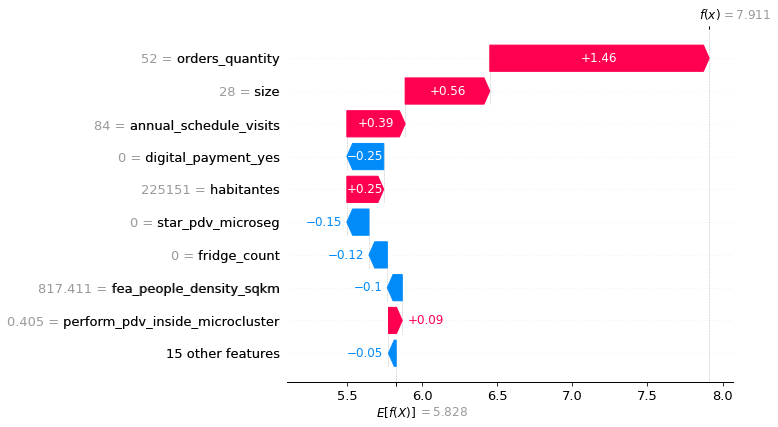

In [ ]:
shap.plots.waterfall(shap_values_2[1231]) #X_all_

**Observaciones:**

**El gráfico se lee desde abajo hacia arriba, donde E[f(X)]=5.828 kgn es la predicción base, es la predicción cuando no existe ninguna Feature incorporada al modelo, es decir la media del target las "ventas promedio para éste PDV". Luego se incorporan las features una a una hasta llegar a la predicción de las ventas PARA ÉSTE PDV  (f[X]=7.911) realizada por el modelo**

**Luego se incorporan sucesivamente las diferentes Features y se calcula el aporte marginal que cada feature realiza a la predicción de las ventas, por ejemplo "100 other features", tiene en cuenta el aporte del resto de las features a la predicción de las VENTAS = 8% del total de las VENTAS PREDICHAS para este PDV que se está analizando**

**El aporte marginal se muestra en color magenta cuando la contribución marginal para la predicción de las ventas es positivo, y azul cuando el aporte marginal de la feature a la predicción de las ventas es negativo, para el PDV bajo análisis, tengase en cuenta que con el gráfico se evalua un sólo PDV, POR LO TANTO EN EL CONJUNTO DE PDV el valor negativo del aporte cambia**

**También podemos observar, el valor REAL de la feature para éste PDV. Por ejemplo: "'orders_quantity',,es la feature que más contribuye marginalmente (1.42%) a predecir las ventas promedio del negocio, y su valor real es 52 orders para este PDV"**.



In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print(X_all_.loc[X_['id_pdv_unique'] == 11310180000004408])


        alcoholic_drinks_yes  ...  star_pdv_microseg
108484                  0.00  ...               0.00

[1 rows x 24 columns]


**Obtención de todos los aportes marginales de todas las variables a cada pdv (tabla entregable)**

In [ ]:
filtro = X_['id_pdv_unique'] == 983870000007902
resultado = X_all_.loc[filtro]
type(resultado)
resultado.head(2)

,alcoholic_drinks_yes,pois_school,pois_bus_stop,pois_supermarket,pois_university,digital_payment_yes,subcanal_oriental,size,has_freezer_arcor,fridge_count,weekend_afternoon_19_avg,location_en_una_avenida,menores_de_60,store_totaldevices_19,pdv_per_geohash,annual_schedule_visits,perform_pdv_inside_microcluster,media_mean_salary,habitantes,orders_quantity,fea_people_density_sqkm,EXHIBIDORES ALIMENTOS,EXHIBIDORES GOLOSINAS,star_pdv_microseg
138055,0.00,0,6,0,0,0.00,0,19.00,0.00,0.00,3.71,0.00,157,412,18.00,73,0.33,243558.75,426179.00,14.00,4596.27,0.00,0.00,0.00


##2.General Analysis_Universo ARCOR##

Shap values and metrics for the performance of the model in data of training and test.

Agrupation of the categorical variables.

In [ ]:
from copy import deepcopy

In [ ]:
shap_values_general = deepcopy(shap_values_2)

**Data modification (agrupation of shap values for categorical features)**

In [ ]:
df_shap = pd.DataFrame(data=shap_values_general.values,columns=shap_values_general.feature_names)
df_shap.head()

,alcoholic_drinks_yes,pois_school,pois_bus_stop,pois_supermarket,pois_university,digital_payment_yes,subcanal_oriental,size,has_freezer_arcor,fridge_count,weekend_afternoon_19_avg,location_en_una_avenida,menores_de_60,store_totaldevices_19,pdv_per_geohash,annual_schedule_visits,perform_pdv_inside_microcluster,media_mean_salary,habitantes,orders_quantity,fea_people_density_sqkm,EXHIBIDORES ALIMENTOS,EXHIBIDORES GOLOSINAS,star_pdv_microseg
0,0.02,0.01,-0.02,0.00,0.00,-0.32,-0.01,0.54,-0.00,0.29,-0.02,-0.00,0.07,-0.03,-0.03,0.40,0.12,0.07,0.22,1.17,-0.03,-0.02,-0.01,0.26
1,0.01,-0.02,-0.00,0.03,0.00,-0.23,0.00,0.56,-0.00,-0.12,-0.01,-0.02,0.06,-0.05,-0.03,0.35,0.13,0.07,0.21,1.25,-0.00,-0.02,-0.01,0.31
2,0.02,-0.02,0.01,-0.00,0.00,-0.25,-0.01,0.57,-0.01,-0.12,-0.05,0.01,0.04,-0.00,-0.02,0.44,0.20,0.06,0.27,1.46,-0.13,-0.02,-0.01,-0.15
3,0.04,-0.02,0.01,-0.01,0.00,0.15,-0.01,0.65,-0.00,0.33,-0.02,0.01,0.06,0.03,0.01,0.50,0.09,0.03,0.27,1.07,-0.03,-0.01,-0.01,0.30
4,0.03,-0.02,0.01,0.05,0.00,-0.25,-0.00,0.57,-0.00,-0.12,-0.03,0.01,0.06,-0.05,-0.03,0.41,0.23,0.08,0.26,1.47,-0.08,-0.02,-0.01,-0.14


In [ ]:
df_data = pd.DataFrame(data=shap_values_general.data,columns=shap_values_general.feature_names)
df_data.head()

,alcoholic_drinks_yes,pois_school,pois_bus_stop,pois_supermarket,pois_university,digital_payment_yes,subcanal_oriental,size,has_freezer_arcor,fridge_count,weekend_afternoon_19_avg,location_en_una_avenida,menores_de_60,store_totaldevices_19,pdv_per_geohash,annual_schedule_visits,perform_pdv_inside_microcluster,media_mean_salary,habitantes,orders_quantity,fea_people_density_sqkm,EXHIBIDORES ALIMENTOS,EXHIBIDORES GOLOSINAS,star_pdv_microseg
0,1.00,3.00,7.00,0.00,0.00,0.00,0.00,35.00,0.00,2.00,4.00,0.00,297.00,145.00,22.00,98.00,0.88,270735.37,1776156.00,42.00,12449.01,0.00,0.00,1.00
1,0.00,0.00,3.00,2.00,0.00,0.00,0.00,10.00,0.00,0.00,9.00,1.00,180.00,741.00,12.00,101.00,0.96,274703.05,301118.00,36.00,5748.80,0.00,0.00,1.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,2.47,0.00,129.00,136.00,3.00,99.00,0.76,184007.20,18864.00,10.00,542.52,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,1.00,0.00,35.00,0.00,4.00,1.00,0.00,158.00,1.00,23.00,79.00,0.71,321833.63,654234.00,32.00,2410.86,0.00,0.00,1.00
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,24.00,0.00,0.00,3.39,0.00,18.00,351.00,27.00,65.00,0.80,153300.78,57411.00,41.00,1656.00,0.00,0.00,0.00


**shap values dataframe**

In [ ]:
Microseg_cols = [col for col in df_shap.columns if 'Microseg' in col]
Segment_cols = [col for col in df_shap.columns if 'Segment' in col]
id_pdv_unique_cols = [col for col in df_shap.columns if 'id_pdv_unique' in col]

In [ ]:
# sum of shap values
Micro_serie = df_shap[Microseg_cols].sum(axis=1)
Segment_serie = df_shap[Segment_cols].sum(axis=1)
id_pdv_unique_serie = df_shap[id_pdv_unique_cols].sum(axis=1)


In [ ]:
# delete the columns
df_shap.drop(Microseg_cols+Segment_cols+id_pdv_unique_cols,axis=1,inplace=True)

In [ ]:
# add the new shap columns
df_shap['Microseg'] = Micro_serie
df_shap['Segment'] = Segment_serie
df_shap['id_pdv_unique'] = id_pdv_unique_serie

In [ ]:
df_shap.head()

,alcoholic_drinks_yes,pois_school,pois_bus_stop,pois_supermarket,pois_university,digital_payment_yes,subcanal_oriental,size,has_freezer_arcor,fridge_count,weekend_afternoon_19_avg,location_en_una_avenida,menores_de_60,store_totaldevices_19,pdv_per_geohash,annual_schedule_visits,perform_pdv_inside_microcluster,media_mean_salary,habitantes,orders_quantity,fea_people_density_sqkm,EXHIBIDORES ALIMENTOS,EXHIBIDORES GOLOSINAS,star_pdv_microseg,Microseg,Segment,id_pdv_unique
0,0.02,0.01,-0.02,0.00,0.00,-0.32,-0.01,0.54,-0.00,0.29,-0.02,-0.00,0.07,-0.03,-0.03,0.40,0.12,0.07,0.22,1.17,-0.03,-0.02,-0.01,0.26,0.00,0.00,0.00
1,0.01,-0.02,-0.00,0.03,0.00,-0.23,0.00,0.56,-0.00,-0.12,-0.01,-0.02,0.06,-0.05,-0.03,0.35,0.13,0.07,0.21,1.25,-0.00,-0.02,-0.01,0.31,0.00,0.00,0.00
2,0.02,-0.02,0.01,-0.00,0.00,-0.25,-0.01,0.57,-0.01,-0.12,-0.05,0.01,0.04,-0.00,-0.02,0.44,0.20,0.06,0.27,1.46,-0.13,-0.02,-0.01,-0.15,0.00,0.00,0.00
3,0.04,-0.02,0.01,-0.01,0.00,0.15,-0.01,0.65,-0.00,0.33,-0.02,0.01,0.06,0.03,0.01,0.50,0.09,0.03,0.27,1.07,-0.03,-0.01,-0.01,0.30,0.00,0.00,0.00
4,0.03,-0.02,0.01,0.05,0.00,-0.25,-0.00,0.57,-0.00,-0.12,-0.03,0.01,0.06,-0.05,-0.03,0.41,0.23,0.08,0.26,1.47,-0.08,-0.02,-0.01,-0.14,0.00,0.00,0.00


**Data dataframe**

In [ ]:
# delete the columns
df_data.drop(Microseg_cols+Segment_cols+id_pdv_unique_cols,axis=1,inplace=True)

In [ ]:
df_data.head()

,alcoholic_drinks_yes,pois_school,pois_bus_stop,pois_supermarket,pois_university,digital_payment_yes,subcanal_oriental,size,has_freezer_arcor,fridge_count,weekend_afternoon_19_avg,location_en_una_avenida,menores_de_60,store_totaldevices_19,pdv_per_geohash,annual_schedule_visits,perform_pdv_inside_microcluster,media_mean_salary,habitantes,orders_quantity,fea_people_density_sqkm,EXHIBIDORES ALIMENTOS,EXHIBIDORES GOLOSINAS,star_pdv_microseg
0,1.00,3.00,7.00,0.00,0.00,0.00,0.00,35.00,0.00,2.00,4.00,0.00,297.00,145.00,22.00,98.00,0.88,270735.37,1776156.00,42.00,12449.01,0.00,0.00,1.00
1,0.00,0.00,3.00,2.00,0.00,0.00,0.00,10.00,0.00,0.00,9.00,1.00,180.00,741.00,12.00,101.00,0.96,274703.05,301118.00,36.00,5748.80,0.00,0.00,1.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,2.47,0.00,129.00,136.00,3.00,99.00,0.76,184007.20,18864.00,10.00,542.52,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,1.00,0.00,35.00,0.00,4.00,1.00,0.00,158.00,1.00,23.00,79.00,0.71,321833.63,654234.00,32.00,2410.86,0.00,0.00,1.00
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,24.00,0.00,0.00,3.39,0.00,18.00,351.00,27.00,65.00,0.80,153300.78,57411.00,41.00,1656.00,0.00,0.00,0.00


In [ ]:
moi_pd_potential_mdt_clean_select.shape

Out[67]: (177852, 41)

In [ ]:
# add the new data columns containing values of original df (before transformation)
df_data['Microseg'] = moi_pd_potential_mdt_clean_select['Microseg'].copy()
df_data['Segment'] = moi_pd_potential_mdt_clean_select['Segment'].copy()
df_data['id_pdv_unique'] = moi_pd_potential_mdt_clean_select['id_pdv_unique'].copy()


In [ ]:
df_data.head()

,alcoholic_drinks_yes,pois_school,pois_bus_stop,pois_supermarket,pois_university,digital_payment_yes,subcanal_oriental,size,has_freezer_arcor,fridge_count,weekend_afternoon_19_avg,location_en_una_avenida,menores_de_60,store_totaldevices_19,pdv_per_geohash,annual_schedule_visits,perform_pdv_inside_microcluster,media_mean_salary,habitantes,orders_quantity,fea_people_density_sqkm,EXHIBIDORES ALIMENTOS,EXHIBIDORES GOLOSINAS,star_pdv_microseg,Microseg,Segment,id_pdv_unique
0,1.00,3.00,7.00,0.00,0.00,0.00,0.00,35.00,0.00,2.00,4.00,0.00,297.00,145.00,22.00,98.00,0.88,270735.37,1776156.00,42.00,12449.01,0.00,0.00,1.00,41.00,4.00,675180000013459
1,0.00,0.00,3.00,2.00,0.00,0.00,0.00,10.00,0.00,0.00,9.00,1.00,180.00,741.00,12.00,101.00,0.96,274703.05,301118.00,36.00,5748.80,0.00,0.00,1.00,58.00,2.00,675560000006578
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,2.47,0.00,129.00,136.00,3.00,99.00,0.76,184007.20,18864.00,10.00,542.52,0.00,0.00,0.00,9.00,5.00,676310000003127
3,1.00,0.00,0.00,0.00,0.00,1.00,0.00,35.00,0.00,4.00,1.00,0.00,158.00,1.00,23.00,79.00,0.71,321833.63,654234.00,32.00,2410.86,0.00,0.00,1.00,12.00,3.00,676780000090193
4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,24.00,0.00,0.00,3.39,0.00,18.00,351.00,27.00,65.00,0.80,153300.78,57411.00,41.00,1656.00,0.00,0.00,0.00,26.00,4.00,676830000090197


**Explainer data reeplacement**

In [ ]:
# change explainer data and shap values
shap_values_general.data = df_data.values
shap_values_general.values = df_shap.values

In [ ]:
# change feature names
shap_values_general.feature_names = df_data.columns.tolist()

##2.1.Bar plot##

The shap.summary_plot function with plot_type=”bar” let you produce the variable importance plot.

A variable importance plot lists the most significant variables in descending order. The top variables contribute more to the model than the bottom ones and thus have high predictive power.

**Train Data**

In [ ]:
# mean of absolute values
#data_train_limit= 100  # Asigna un valor adecuado a data_train_limit
#shap.plots.bar(shap_values_general[:data_train_limit], max_display=(24))


In [ ]:
# mean values
#data_test_limit=1000
#shap.plots.bar(shap_values_general[:data_train_limit].mean(0), max_display=24)

**Test Data**


In [ ]:
# mean of absolute values
#X_test_limit = 25 # Asigna un valor adecuado a data_train_limit
#shap.plots.bar(shap_values_general[:data_test_limit], max_display=24)


In [ ]:
# mean values
#shap.plots.bar(shap_values_general[data_test_limit:].mean(0), max_display=24)

**All Data**

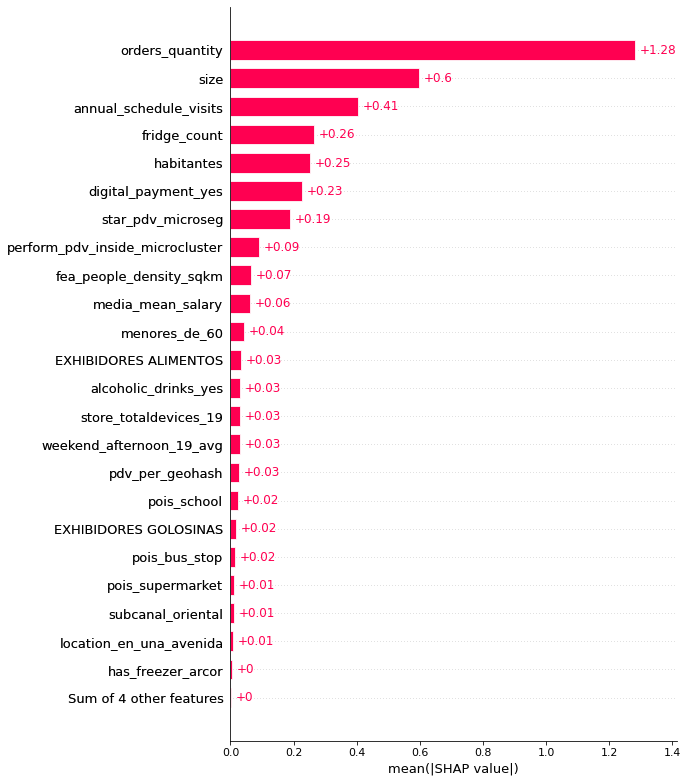

In [ ]:
# mean of absolute values
shap.plots.bar(shap_values_general, max_display=24)

**Observaciones:**

**order_quantity es la feature que más contribuye a la predicción del modelo global teniendo en cuenta todos los PDV´s expresado en el valor absoluto medio de las ventas totales.**

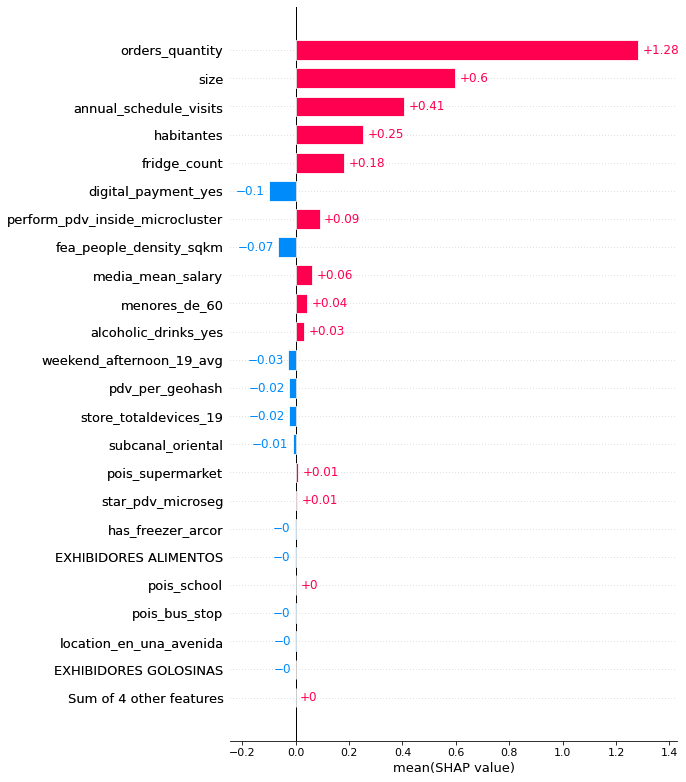

In [ ]:
# mean values
shap.plots.bar(shap_values_general.mean(0), max_display=24)

**Observaciones:**

**Las barras Magentas representan contribución media marginal positiva al modelo global, las azules negativas**

**Se obtienen los valores medios de shap, la contribuciones medias marginales que cada feature aporta a la predicción de las ventas, y al no ser valores absolutos pueden ser positivos y/ó negativos. Por ej: "digital_payment_yes" para algunos PDV, contribuye positivamente y para otros negativamente cuando sumamos esas contribuciones para todo el modelo global el promedio de las contribuciones es negativo, por lo tanto "digital_payment_yes" es negativo (azul)**

##2.2.Summary plot##

This plot is made of all the dots in the train data. It demonstrates the following information:

**Feature importance: Variables are ranked in descending order.**

**Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction**

**Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.**

**Correlation: Color and the X-axis variability show correlation tendence with the target value.**

**Train Data**

In [ ]:
#shap.summary_plot(shap_values_general[data_train_limit:], max_display=len(shap_values_general.feature_names))

**Test Data**

In [ ]:
#shap.summary_plot(shap_values_general[data_test_limit:], max_display=len(shap_values_general.feature_names))

**All Data**

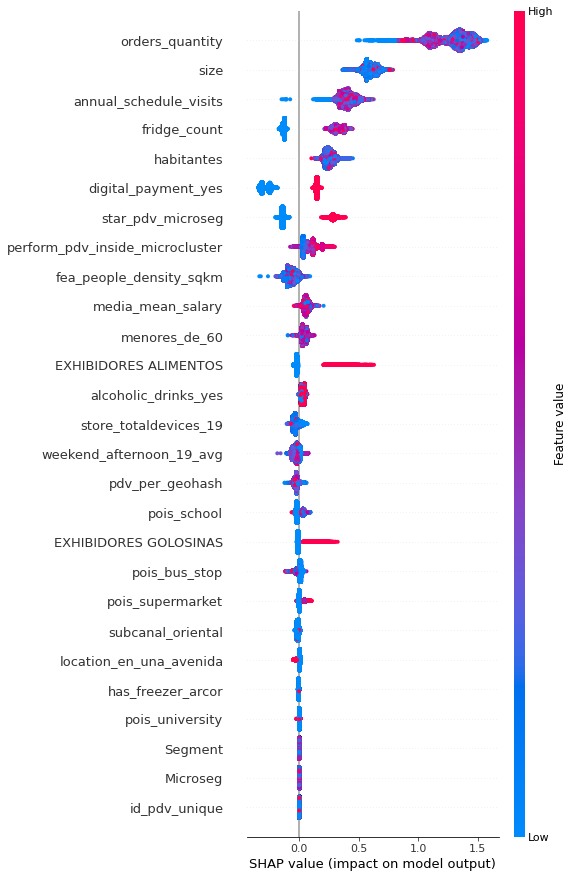

In [ ]:
shap.summary_plot(shap_values_general, max_display=len(shap_values_general.feature_names))
#shap.summary_plot(shap_values_general, df_data, plot_size=[8,12])
#print(f'Size: {plt.gcf().get_size_inches()}')

# Add this code
#print(f'Original size: {plt.gcf().get_size_inches()}')
#w, _ = plt.gcf().get_size_inches()
#plt.gcf().set_size_inches(w, w*12/4)
#plt.tight_layout()
#_, h = plt.gcf().get_size_inches()
#plt.gcf().set_size_inches(h*12/46, h)



**Observaciones:**

**1.Feature importance:Las features están ordenadas de mayor a menor según el nivel de importancia en la predicción de las ventas**

**2.El valor central SHAP=0, es el valor base es decir la prediccion del modelo sin features por lo tanto hace referencia a las ventas promedios sin predicir**

**3.Impact:La lectura horizontal para cada feature indica si el efecto es asociado con predicciones altas o bajas de las predicciones de ventas.Por ejemplo: En general,"orders_quantity","Size","habitantes", están asociados con valores altos de la predicción de las ventas tanto cuando poseen valores pequeños(azules)ó valores altos(Magenta).Mientras que "digital_pay_yes",con valores altos (Magenta) se asocia con ventas altas predichas y valores pequeños (azul) se asocia con ventas menores predichas**

**4.Original value:el color de los puntos que representan los SHAP de cada PDV (contribución marginal a la predicción de ventas)muestran el valor original por PDV, es decir si el PDV es Magenta posee valor alto de esa features y si es azul el PDV, posee valor pequeño de esa feature**

**5.Correlation: El color y como varía sobre el eje de las X-axis muestra la tendencia de la correlación con el TARGET ó ventas promedios. Por ej:"orders_quantity" posee mucha correlación con las ventas promedios reales que el resto de las features**

##2.3.Cohort bar plot##
Passing a dictionary of Explanation objects will create a multiple-bar plot with one bar type for each of the cohorts represented by the explanation objects. Below we use this to plot a global summary of feature importance seperately.

In [ ]:
df_data['Segment'].unique()

Out[81]: [4.00, 2.00, 5.00, 3.00, 1.00, 8.00, 6.00, 7.00]
Categories (8, float64): [1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00]

In [ ]:
#Define un diccionario que mapea los valores numéricos a los nombres de las categorías
mapping_dict = {
    1.00: 'SEG_1',
    2.00: 'SEG_2',
    3.00: 'SEG_3',
    4.00: 'SEG_4',
    5.00: 'SEG_5',
    6.00: 'SEG_6',
    7.00: 'SEG_7',
    8.00: 'SEG_8',

    # Agrega más asignaciones según sea necesario
}

# Convierte la columna 'Segment' a categórica y aplica el mapeo
df_data['Segment'] = df_data['Segment'].astype('category')
df_data['Segment'] = df_data['Segment'].cat.rename_categories(mapping_dict)


**Train Data**

In [ ]:

#data_train_limit=1000
#seg = df_data[:data_train_limit]['Segment'].values.tolist()
#shap.plots.bar(shap_values_general[:data_train_limit].cohorts(seg).abs.mean(0), max_display=24)




**Test data**

In [ ]:

#data_test_limit=1000
#seg = df_data[:data_test_limit]['Segment'].values.tolist()
#shap.plots.bar(shap_values_general[:data_test_limit].cohorts(seg).abs.mean(0), max_display=24)


**All data**

In [ ]:
shap.__version__
shap.initjs()

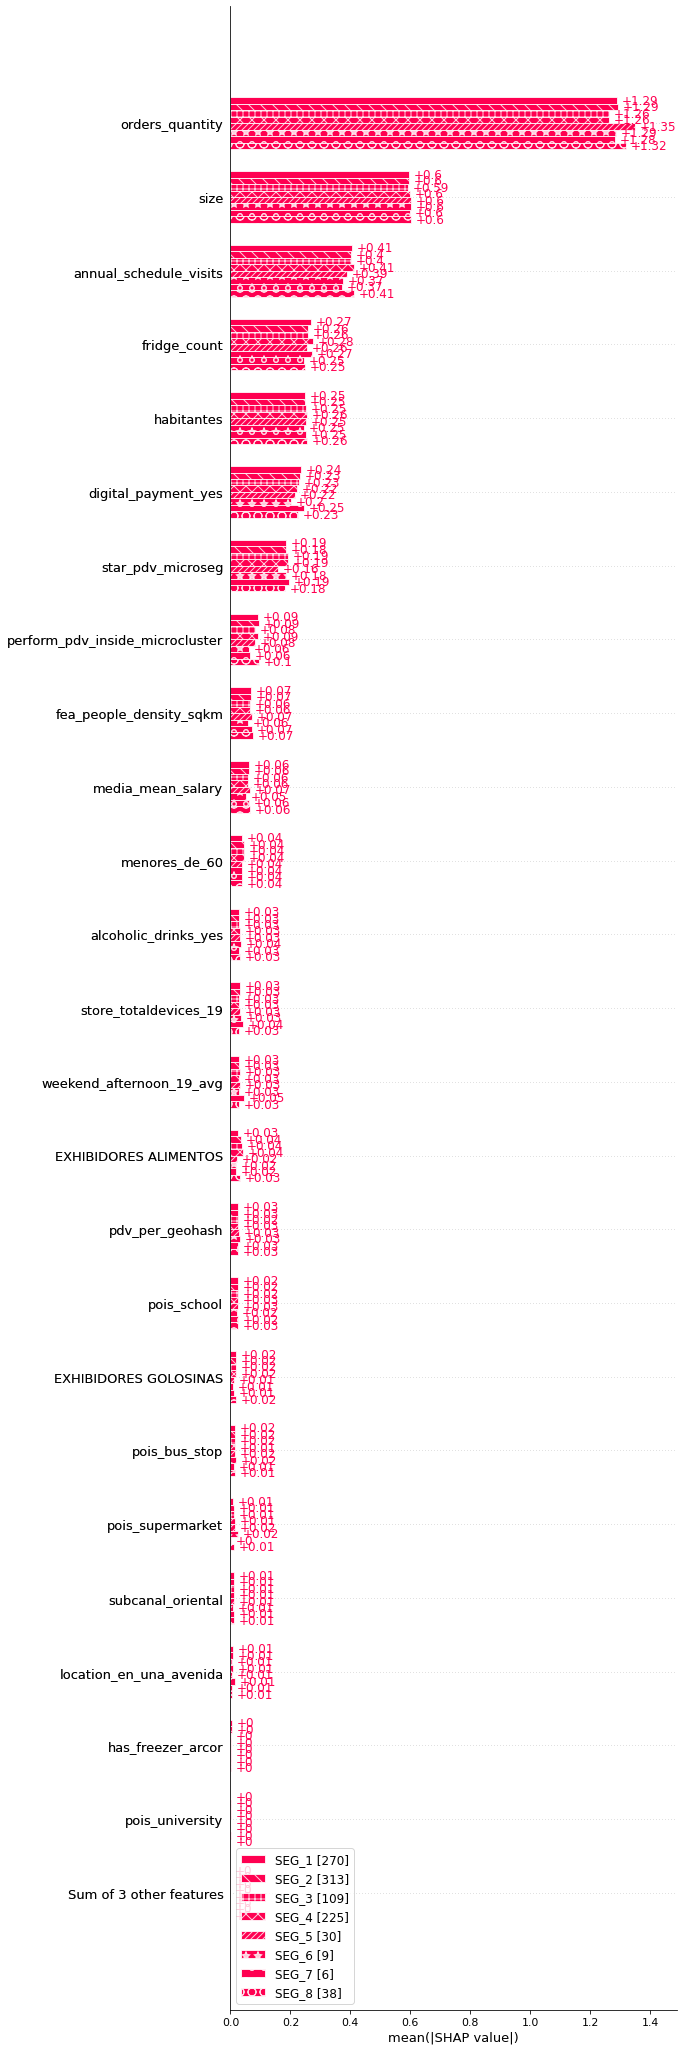

In [ ]:
#multiple-bar plot with one bar type for each of the cohorts
data_limit=1000
seg = df_data[:data_limit]['Segment'].values.tolist()
shap.plots.bar(shap_values_general[:data_limit].cohorts(seg).abs.mean(0), max_display=25)



**Observaciones:**

 **Gráfico de barras múltiples, para cada feature de interés se muestra cada nivel de segmentación, detectando el aporte marginal de cada feature a cada segmento, cuando se predice el TARGET**

 **"orders_quatity", arroja una importancia (aporte marginal) de: 1,29 = SEG_1; 1,29=SEG_2; 1,26=SEG_3; 1,20=SEG_4; 1,35=SEG_5;1,29=SEG_6 1,28=SEG_7; 1,32=SEG_8**  


**Crear y guardar archivo excel**

In [ ]:
%pip install openpyxl


Python interpreter will be restarted.
Python interpreter will be restarted.


In [ ]:
# Asegúrate de que shap_values_general sea una matriz bidimensional
shap_values_array = shap_values_general

# Asegúrate de que shap_values_general.feature_names contenga los nombres de las características en el mismo orden
feature_names = shap_values_general.feature_names

# Crea el DataFrame de pandas
shap_values_df = pd.DataFrame(shap_values_array, columns=feature_names)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-4008379400667519>:2
      1 # Asegúrate de que shap_values_general sea una matriz bidimensional
----> 2 shap_values_array = shap_values_general
      4 # Asegúrate de que shap_values_general.feature_names contenga los nombres de las características en el mismo orden
      5 feature_names = shap_values_general.feature_names

NameError: name 'shap_values_general' is not defined

In [ ]:

# Ruta completa del archivo Excel donde deseas guardar el DataFrame
nombre_archivo_excel = "/dbfs/mnt/sandbox/distribuidora/AR/Development/excdelpila/shap_values.xlsx"

# Guarda el DataFrame en un archivo Excel
shap_values_df.to_excel(nombre_archivo_excel, index=False, engine='openpyxl')
